# NK cell annotations by Melsen et al., (2022), visualization

Gene sets used to identify different NK cell subpopulations by Melsen et al., are visualized in this notebook. Normalized RNA counts are used in calculations of gene scores. Neurips cell type annotations are used. UMAPs are generated using latent space representation of measured RNA and surface protein data. 

According to scanpy documentation: "Gene scores are calculated using scanpy score_genes function. The score is the average expression of a set of genes subtracted with the average expression of a reference set of genes. The reference set is randomly sampled from the gene_pool for each binned expression value." 

Reference: 
Melsen, J. E., van Ostaijen-Ten Dam, M. M., Schoorl, D. J. A., Schol, P. J., van den Homberg, D. A. L., Lankester, A. C., Lugthart, G., & Schilham, M. W. (2022). Single-cell transcriptomics in bone marrow delineates CD56dimGranzymeK+ subset as intermediate stage in NK cell differentiation. Frontiers in immunology, 13, 1044398. https://doi.org/10.3389/fimmu.2022.1044398

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [4]:
#Neurips
adata_neurips = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm_outer.h5ad')

In [5]:
neurips_subset = adata_neurips[(adata_neurips.obs['cell_type'] == "NK") | (adata_neurips.obs['cell_type'] == "NK CD158e1+") 
                | (adata_neurips.obs['cell_type'] == "ILC") 
                | (adata_neurips.obs['cell_type'] == "gdT CD158b+")
                | (adata_neurips.obs['cell_type'] == 'CD8+ T CD69+ CD45RA+') 
                   | (adata_neurips.obs['cell_type'] == 'CD4+ T activated') 
                   | (adata_neurips.obs['cell_type'] == 'CD8+ T CD69+ CD45RO+')
                   | (adata_neurips.obs['cell_type'] == 'CD8+ T CD49f+') 
                   | (adata_neurips.obs['cell_type'] == 'CD4+ T naive') 
                      | (adata_neurips.obs['cell_type'] == 'CD8+ T naive') 
                      | (adata_neurips.obs['cell_type'] == 'CD4+ T activated integrinB7+') 
                      | (adata_neurips.obs['cell_type'] == 'gdT TCRVD2+') 
                      | (adata_neurips.obs['cell_type'] == 'CD8+ T TIGIT+ CD45RO+') 
                      | (adata_neurips.obs['cell_type'] == 'MAIT') 
                      | (adata_neurips.obs['cell_type'] == 'T reg') 
                      | (adata_neurips.obs['cell_type'] == 'gdT CD158b+') 
                      | (adata_neurips.obs['cell_type'] == 'CD8+ T CD57+ CD45RO+') 
                      | (adata_neurips.obs['cell_type'] == 'ILC1') 
                      | (adata_neurips.obs['cell_type'] == 'Lymph prog') 
                      | (adata_neurips.obs['cell_type'] == 'ILC') 
                      | (adata_neurips.obs['cell_type'] == 'CD8+ T CD57+ CD45RA+') 
                      | (adata_neurips.obs['cell_type'] == 'CD8+ T TIGIT+ CD45RA+') 
                      | (adata_neurips.obs['cell_type'] == 'CD8+ T naive CD127+ CD26- CD101-') 
                      | (adata_neurips.obs['cell_type'] == 'CD4+ T CD314+ CD45RA+') 
                      | (adata_neurips.obs['cell_type'] == 'T prog cycling') 
                      | (adata_neurips.obs['cell_type'] == 'dnT')]

neurips_subset

View of AnnData object with n_obs × n_vars = 35701 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [6]:
#Computing a neighborhood of observations using latent space, before subsetting the data

sc.pp.neighbors(neurips_subset, use_rep="X_totalVI")   

sc.tl.umap(neurips_subset)

In [7]:
#protein infromation for selected subset
neurips_subset_prot=neurips_subset.obsm['protein_expression_clr_neurips']

In [8]:
#To exclude columns that contain only zeros

neurips_subset_prot = pd.DataFrame(neurips_subset_prot)
neurips_subset_prot != 0
(neurips_subset_prot != 0).any(axis=0)
neurips_subset_prot.loc[:, (neurips_subset_prot != 0).any(axis=0)]
neurips_subset_prot = neurips_subset_prot.loc[:, (neurips_subset_prot != 0).any(axis=0)]

In [9]:
#some proteins and genes have same names, here _prot added after protein names
neurips_subset_prot=neurips_subset_prot.rename(columns={'CD2': 'CD2_prot', 'CX3CR1': 'CX3CR1_prot', 'CD226':'CD226_prot', 'TIGIT':'TIGIT_prot', 'CD27':'CD27_prot', 'CD38': 'CD38_prot','CD34': 'CD34_prot', 'CD224': 'CD224_prot', 'CD7': 'CD7_prot', 'CD44': 'CD44_prot', 'CD34': 'CD34_prot','CD5': 'CD5_prot'})

In [10]:
#adding protein information to obs

a = neurips_subset.obs
b = neurips_subset_prot

df=pd.concat([a, b], axis=1)
neurips_subset.obs=df

In [11]:
neurips_subset

AnnData object with n_obs × n_vars = 35701 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40', 'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7_prot', 'CD105', 'CD49f', 'CD194', 'CD4', 'CD44_prot', 'CD14', 'CD16', 'CD25'

In [12]:
neurips_nk = neurips_subset[(neurips_subset.obs['cell_type'] == "NK") | (neurips_subset.obs['cell_type'] == "NK CD158e1+") 
                | (neurips_subset.obs['cell_type'] == "ILC") 
                | (neurips_subset.obs['cell_type'] == "gdT CD158b+")]
                            
neurips_nk

View of AnnData object with n_obs × n_vars = 8237 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40', 'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7_prot', 'CD105', 'CD49f', 'CD194', 'CD4', 'CD44_prot', 'CD14', 'CD16',

In [13]:
#selecting one sample from Neurips, all cell types

eg=adata_neurips[adata_neurips.obs['POOL'] == "s4d1"]
eg

View of AnnData object with n_obs × n_vars = 4885 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    layers: 'counts'

In [14]:
#one sample, includes only selected cell types
eg_subset = neurips_subset[neurips_subset.obs['POOL'] == "s4d1"]

eg_subset

View of AnnData object with n_obs × n_vars = 2989 × 21720
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40', 'CD154', 'CD52', 'CD3', 'CD8', 'CD56', 'CD19', 'CD33', 'CD11c', 'HLA-A-B-C', 'CD45RA', 'CD123', 'CD7_prot', 'CD105', 'CD49f', 'CD194', 'CD4', 'CD44_prot', 'CD14', 'CD16',

In [15]:
#Computing a neighborhood of observations using latent space

sc.pp.neighbors(adata_neurips, use_rep="X_totalVI")   

sc.tl.umap(adata_neurips)

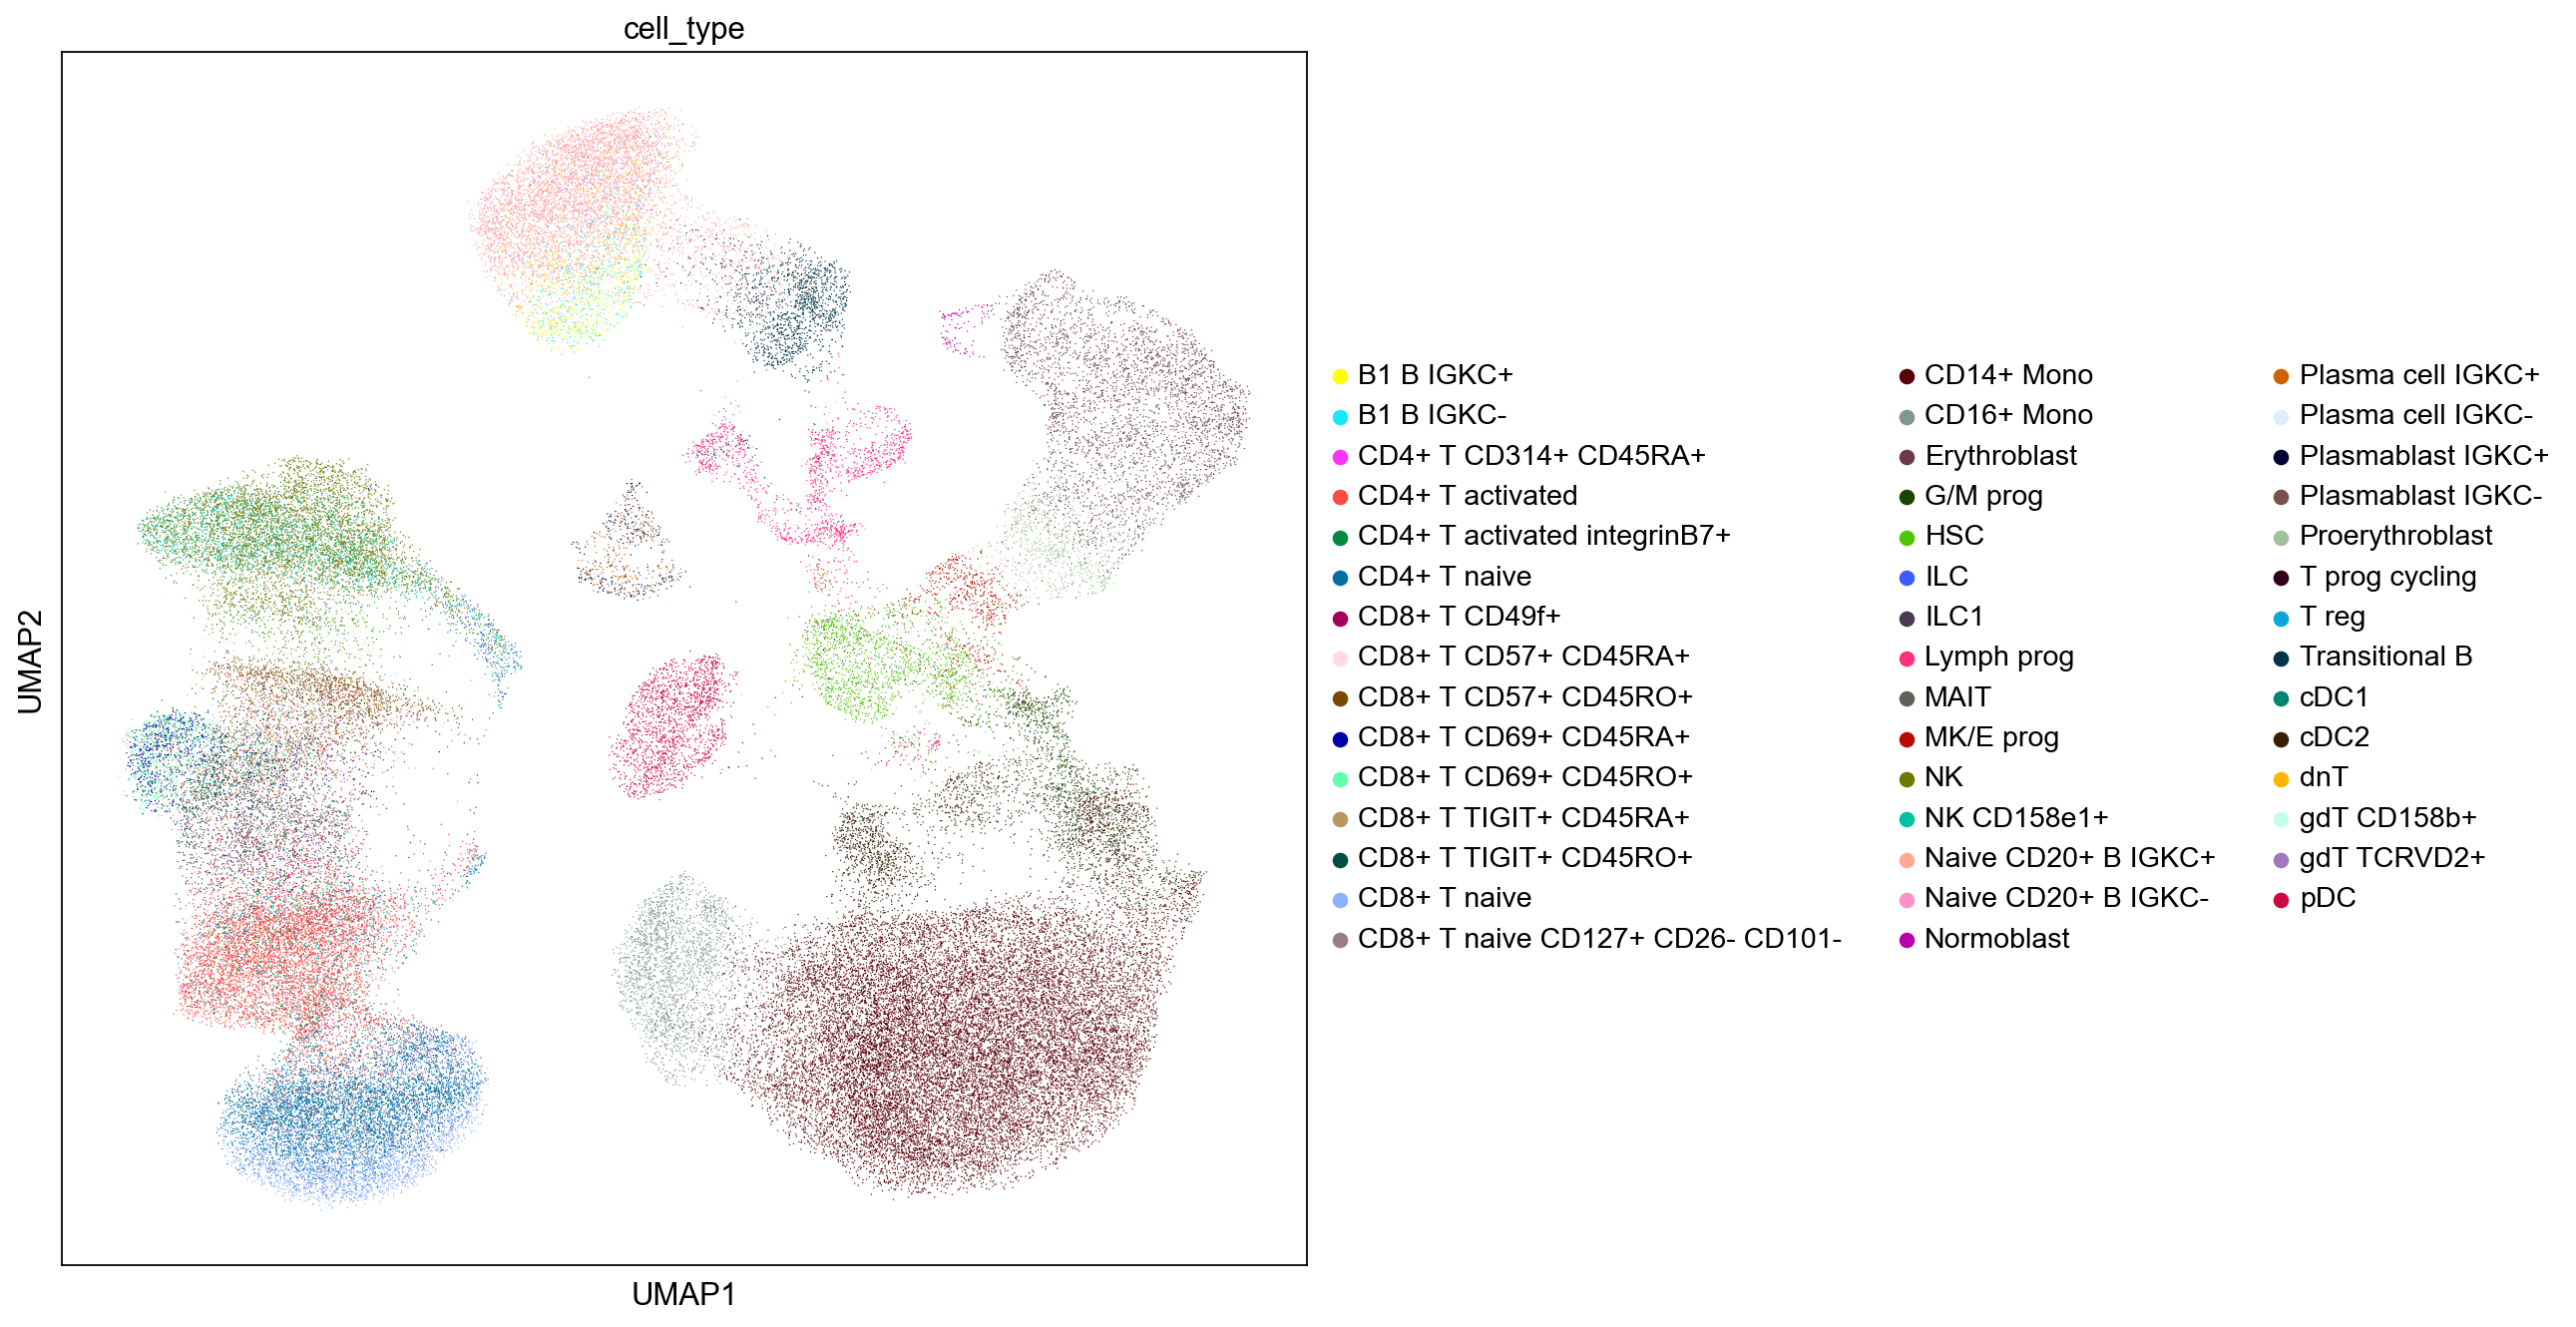

In [16]:
#Whole Neurips dataset plotted

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(adata_neurips, color = ['cell_type'], color_map = 'viridis')

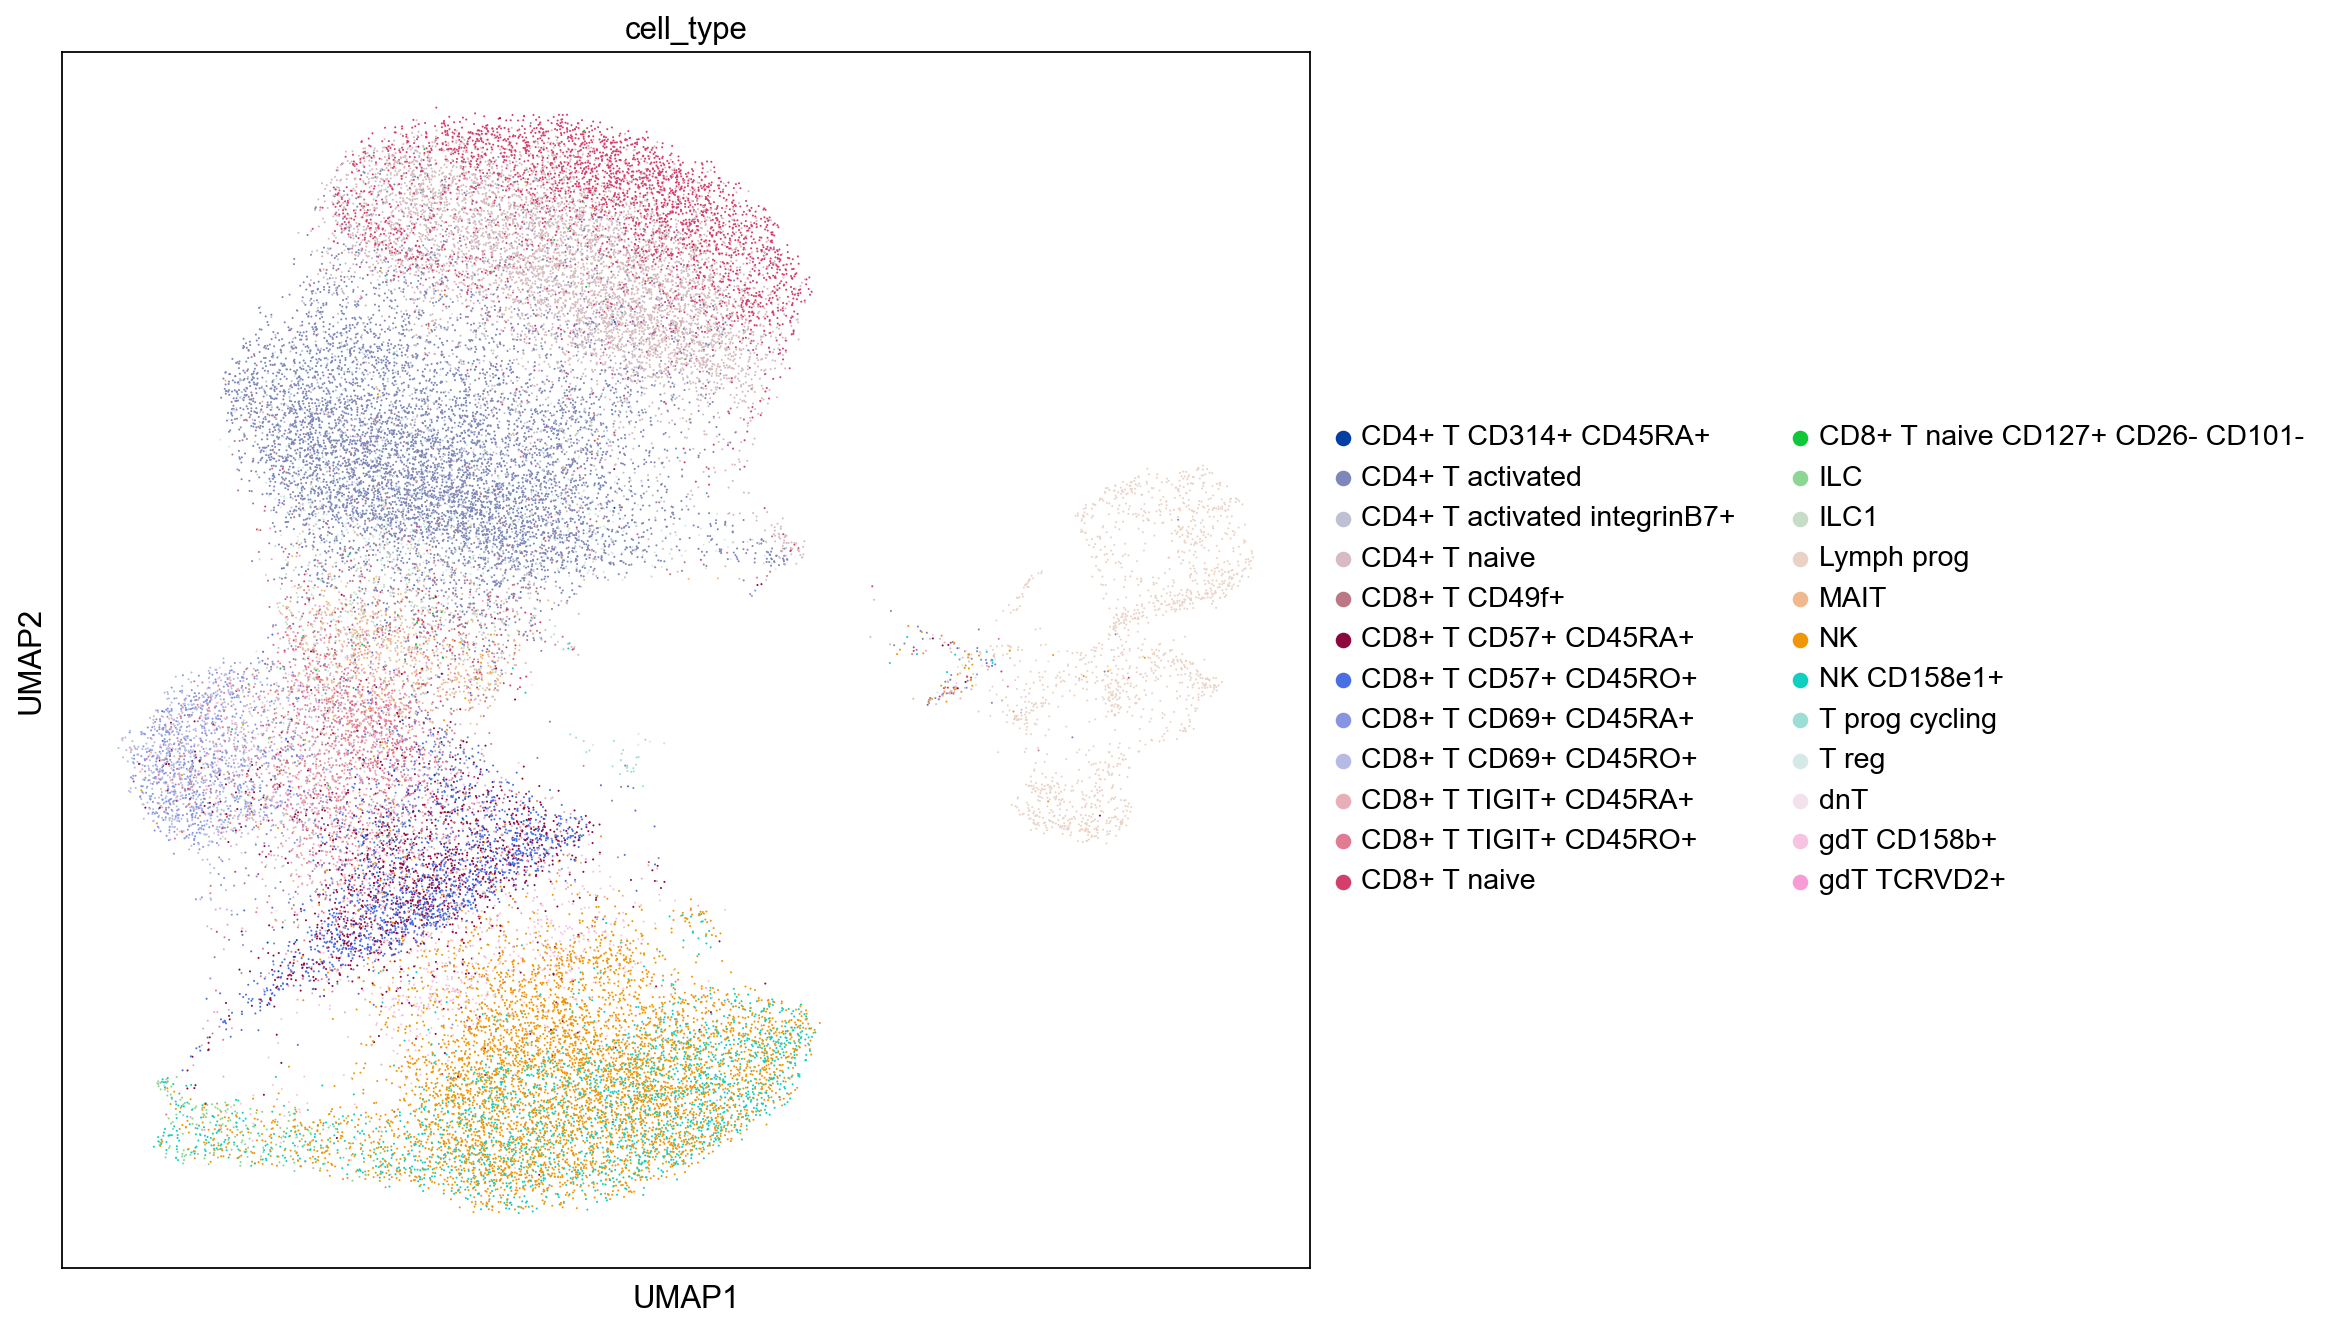

In [17]:
# Selected cells cells from Neurips dataset, coloured by samples

sc.set_figure_params(figsize=(10, 10))

sc.pl.umap(neurips_subset, color = ['cell_type'], color_map = 'viridis')

## Markers by Melsen et al.

- scRNA-seq on bone marrow. 
- CD56, CXCR6, CD117 and CD34 oligonucleotide-conjugated antibodies were used
- healthy donors, 1 BM transplant recipient


### 8 NK cell cluster were defined: #

1. Mature CD56dim NK cells (83% of all cells)
2. lymhphoid tissue-resident (lt) CXCR6+ NK cells (4%) 
3. CD34+ (progenitors?) (1.9%)
4. immature CD56bright NK cells (
5. non-cytotoxic innate lymphoid cells (ILCs)
6. proliferating NK cells
7. Mature CD56dim NK cells (3.4% of all cells)
8. CD56- and CD16+ NK cells with reduced effector function


### Markers: #

1. GZMK-, S100A4, S100A6, ACTB, ACTG1, CORO1A, PFN1. 
2. CCL3, CCL4, XCL1, GZMK, CD160, DUSP2, CXCR4, BTG1
3. Mainly defined by absence of CCL5, CD117+
4. SELL (CD62L), CD2, CD117, IL7R, high expression of KLRC1, CD56bright
5. Absence of NKG7, high expression of IL7R, high expression of FGFBP2, PRSS23
6. Upregulated cell cycle genes, high S100A4, S100A6, KLRC2. Upregulation of IL32, GZMH and GNLY, and downregulation of KLRC1, KLRB1 (CD161) and CD160
7. GZMK+, higher expression of SELL (CD62L) and lower expression of GZMB, PRF1 and PCGR3A (CD16) compared to cluster 1. Intermediate stage between CD56bright and CD56dim? 
8. Express NKG7 and FCGR3A, but had low expression of PRF1 and GZMB. CD56-, CD16+. 


- Generally, inhibitory KIRs more frequently expressed in terminally differentiated cells, but in this study were not in top5 DE genes. 
- When comparing to other datasets,  CD56- NK cells not found (probably donor specific). The CD34+ and ltNK cells were barely detected in blood (likely bone-marrow resident). 
- New identified cluster 2, CD56dim GZMK+. Likely intermediate state between CD56bright and CD56dim
- pseudotime analysis of terminally differentiated cells : FGFBP2, PRF1,GZMB, GZMK. Shift from granzyme K to granzyme B during differentiation. 

In [19]:
#Used to check which genes were measured

#listOfmarkers= tr_mels
#tr_mels = []

#for x in listOfmarkers:
#    if x in adata_neurips.var_names:
#        tr_mels.append(x)

#print(tr_mels)

In [20]:
#Used to check which markers were measured


#listOfmarkers= ['CD160']


#for x in listOfmarkers:
#    if x in prot.columns:
#        print(x)


## 1. CD56bright immature NK cells (cluster 4 in the paper)

In [21]:
cd56bright_mels = ['NCAM1', 'KIT', 'SELL', 'CD2', 'IL7R', 'KLRC1']

In [23]:
sc.tl.score_genes(eg, cd56bright_mels, score_name = 'cd56bright_mels_score')

sc.tl.score_genes(sample_nk, cd56bright_mels, score_name = 'cd56bright_mels_score')


In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

sc.pl.umap(eg, color = ['cd56bright_mels_score'], vmax="p99", color_map = 'viridis', ncols=2)

sc.pl.umap(sample_nk, color = ['cd56bright_mels_score'], vmax="p99", color_map = 'viridis', ncols=2)


In [ ]:
sc.set_figure_params(figsize=(10, 7))

sc.pl.violin(sample_nk, ['cd56bright_mels_score'], groupby='cell_type', stripplot=False, inner='box', rotation=90)  


In [ ]:
sc.set_figure_params(figsize=(10, 7))

sc.pl.violin(eg, ['cd56bright_mels_score'], groupby='cell_type', stripplot=False, inner='box', rotation=90)  



In [ ]:
sc.pl.dotplot(eg, cd56bright_mels, 'cell_type', dendrogram=True)

In [ ]:
sc.pl.dotplot(sample_nk, cd56bright_mels, 'cell_type', dendrogram=True)

## 2. CD56dim NK cells (clusters 1 and 7 in the paper)

In [ ]:
#cluster 1
cd56dim_1_high= ['S100A4', 'S100A6', 'ACTB', 'ACTG1', 'CORO1A', 'PFN1']
cd56dim_1_low = ['GZMK']

#cluster 7
cd56dim_7_high = ['GZMK', 'SELL'] #higher expression compared to cluster 1
cd56dim_7_low = ['GZMB', 'PRF1', 'FCGR3A', 'FGFBP2'] #lower expression compared to cluster 1


In [ ]:
#calculating scores

#cluster 1

sc.tl.score_genes(sample_nk, cd56dim_1_high, score_name = 'cd56dim_1_high_score')
sc.tl.score_genes(eg, cd56dim_1_high, score_name = 'cd56dim_1_high_score')

sc.tl.score_genes(sample_nk, cd56dim_1_low, score_name = 'cd56dim_1_low_score')
sc.tl.score_genes(eg, cd56dim_1_low, score_name = 'cd56dim_1_low_score')

#cluster 7

sc.tl.score_genes(sample_nk, cd56dim_7_high, score_name = 'cd56dim_7_high_score')
sc.tl.score_genes(eg, cd56dim_7_high, score_name = 'cd56dim_7_high_score')

sc.tl.score_genes(sample_nk, cd56dim_7_low, score_name = 'cd56dim_7_low_score')
sc.tl.score_genes(eg, cd56dim_7_low, score_name = 'cd56dim_7_low_score')


In [ ]:
sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

#cluster 1

print("Cluster 1, scores calculated from genes expected to be highly expressed")

sc.pl.umap(sample_nk, color = ['cd56dim_1_high_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['cd56dim_1_high_score'], vmax="p99", color_map = 'viridis', ncols=2)

print("Cluster 1, scores calculated from genes expected to be xpressed at low levels")
sc.pl.umap(sample_nk, color = ['cd56dim_1_low_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['cd56dim_1_low_score'], vmax="p99", color_map = 'viridis', ncols=2)

#cluster 7

print("Cluster 7, scores calculated from genes expected to be highly expressed")
sc.pl.umap(sample_nk, color = ['cd56dim_7_high_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['cd56dim_7_high_score'], vmax="p99", color_map = 'viridis', ncols=2)


print("Cluster 7, scores calculated from genes expected to be expressed at low levels")
sc.pl.umap(sample_nk, color = ['cd56dim_7_low_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['cd56dim_7_low_score'], vmax="p99", color_map = 'viridis', ncols=2)




In [ ]:
print("Cluster 1, high markers")
sc.pl.dotplot(eg, cd56dim_1_high, 'cell_type', dendrogram=True)
sc.pl.dotplot(sample_nk, cd56dim_1_high, 'cell_type', dendrogram=True)

- In the study conducted by Melsen et al., these markers (above) were expressed a higher levels in cluster 1 compared to cluster 7. Both clusters were composed of mature CD56dim NK cells, cluster 7 was suggested to be a intermediate stage between CD56bright (clust 4) and CD56dim NK (clust 1) cells. 
- From these dotplots we can see that these genes are quite higly expressd in all cell types. 
- S100A4 and C100A6 not expressed in ILCs? 

In [ ]:
print("Cluster 1, low markers")
sc.pl.dotplot(eg, cd56dim_1_low, 'cell_type', dendrogram=True)
sc.pl.dotplot(sample_nk, cd56dim_1_low, 'cell_type', dendrogram=True)

- In the study conducted by Melsen et al., these markers (above) were expressed at lower levels in cluster 1 compared to cluster 7. Both clusters were composed of mature CD56dim NK cells. 
- The most mature CD158e1+ NK cells express less GZMK. According to study, shifht from GZMK to GZMB happens when NK cells are maturating. 

In [ ]:
print("Cluster 7, high markers")
sc.pl.dotplot(eg, cd56dim_7_high, 'cell_type', dendrogram=True)
sc.pl.dotplot(sample_nk, cd56dim_7_high, 'cell_type', dendrogram=True)

- These markers (above) were expressed at high levels in cluster 7 compared to cluster 1. Both clusters were composed of mature CD56dim NK cells. 
- Still, not very highly expressed in NK cells but higher expression is seen in more immature NK cells (vs. more mature CD158e1+ NK cells) 

In [ ]:
print("Cluster 7, low markers")
sc.pl.dotplot(eg, cd56dim_7_low, 'cell_type', dendrogram=True)
sc.pl.dotplot(sample_nk, cd56dim_7_low, 'cell_type', dendrogram=True)

- These markers (above) were expressed at lower levels in cluster 7 compared to cluster 1. Both clusters were composed of mature CD56dim NK cells. 
- Quite NK cell specific markers, are expressed at higher levels in more mature NK cells as exprected. 

## 3. Tissue resident NK cells (cluster 2 in the paper)

In [ ]:
tr_mels= ['CCL3', 'CCL4', 'XCL1', 'GZMK', 'CD160', 'DUSP2', 'CXCR4', 'BTG1']

In [ ]:
#Calculating scores 

sc.tl.score_genes(eg, tr_mels, score_name = 'tr_mels_score')

sc.tl.score_genes(sample_nk, tr_mels, score_name = 'tr_mels_score')

In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

sc.pl.umap(sample_nk, color = ['tr_mels_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['tr_mels_score'], vmax="p99", color_map = 'viridis', ncols=2)



In [ ]:
sc.pl.dotplot(eg, tr_mels, 'cell_type', dendrogram=True)
sc.pl.dotplot(sample_nk, tr_mels, 'cell_type', dendrogram=True)

## 3. Non-cytotoxic innate lymphoid cells (ILCs, cluster 5 in the paper) 

In [ ]:
ILC_mels_high = ['IL7R', 'KIT', 'FGFBP2', 'PRSS23'] 
ILC_mels_low = ['NKG7']

In [ ]:
#Calculating scores 

sc.tl.score_genes(eg, ILC_mels_high, score_name = 'ILC_mels_high_score')

sc.tl.score_genes(eg, ILC_mels_low, score_name = 'ILC_mels_low_score')

sc.tl.score_genes(sample_nk, ILC_mels_high, score_name = 'ILC_mels_high_score')

sc.tl.score_genes(sample_nk, ILC_mels_low, score_name = 'ILC_mels_low_score')

In [ ]:
sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

print("Scores calculated from genes expected to be highly expressed")
sc.pl.umap(sample_nk, color = ['ILC_mels_high_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['ILC_mels_high_score'], vmax="p99", color_map = 'viridis', ncols=2)

print("Scores calculated from genes expected to be expressed et low levels")
sc.pl.umap(sample_nk, color = ['ILC_mels_low_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['ILC_mels_low_score'], vmax="p99", color_map = 'viridis', ncols=2)



In [ ]:
print("ILCs, high markers")
sc.pl.dotplot(eg, ILC_mels_high, 'cell_type', dendrogram=True)
sc.pl.dotplot(sample_nk, ILC_mels_high, 'cell_type', dendrogram=True)

- Markers (above) were highly expressed in ILCs. 


In [ ]:
print("ILCs, low markers")
sc.pl.dotplot(eg, ILC_mels_low, 'cell_type', dendrogram=True)
sc.pl.dotplot(sample_nk, ILC_mels_low, 'cell_type', dendrogram=True)

- NKG7 (above) was expressed at low levels in ILCs, this data suports the findings. 
- Could be also used to separate ILCs from NK cells? 

## 4. Proliferating NK cells (cluster 6 in the paper)

In [ ]:
prolif_high = ['S100A4', 'S100A6', 'KLRC2', 'IL32', 'GZMH', 'GNLY']
prolif_low = ['KLRC1', 'KLRB1']

In [ ]:
#Calculating scores 

sc.tl.score_genes(eg, prolif_high, score_name = 'prolif_high_score')
sc.tl.score_genes(eg, prolif_low, score_name = 'prolif_low_score')

sc.tl.score_genes(sample_nk, prolif_high, score_name = 'prolif_high_score')
sc.tl.score_genes(sample_nk, prolif_low, score_name = 'prolif_low_score')

In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

print("Scores calculated from genes expected to be highly expressed")
sc.pl.umap(sample_nk, color = ['prolif_high_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['prolif_high_score'], vmax="p99", color_map = 'viridis', ncols=2)

print("Scores calculated from genes expected to be expressed at low levels")
sc.pl.umap(sample_nk, color = ['prolif_low_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['prolif_low_score'], vmax="p99", color_map = 'viridis', ncols=2)




## 5. CD56dim NK cells with reduced effector function (cluster 8 in the paper)

In [ ]:
# CD56dim cells with reduced effector function, cluster 8 in the paper

red_eff_high = ['NKG7', 'FCGR3A']
red_eff_low = ['PRF1', 'GZMB']

In [ ]:
#Calculating scores 

sc.tl.score_genes(eg, red_eff_high, score_name = 'red_eff_high_score')
sc.tl.score_genes(eg, red_eff_low, score_name = 'red_eff_low_score')

sc.tl.score_genes(sample_nk, red_eff_high, score_name = 'red_eff_high_score')
sc.tl.score_genes(sample_nk, red_eff_low, score_name = 'red_eff_low_score')

In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

print("Scores calculated from genes expected to be highly expressed")
sc.pl.umap(sample_nk, color = ['red_eff_high_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['red_eff_high_score'], vmax="p99", color_map = 'viridis', ncols=2)

print("Scores calculated from genes expected to be expressed et low level")
sc.pl.umap(sample_nk, color = ['red_eff_low_score'], vmax="p99", color_map = 'viridis', ncols=2)
sc.pl.umap(eg, color = ['red_eff_low_score'], vmax="p99", color_map = 'viridis', ncols=2)


In [ ]:
print("High markers")

sc.pl.dotplot(eg, red_eff_high, 'cell_type', dendrogram=True)
sc.pl.dotplot(sample_nk, red_eff_high, 'cell_type', dendrogram=True)

In [ ]:
print("Low markers")

sc.pl.dotplot(eg, red_eff_low, 'cell_type', dendrogram=True)
sc.pl.dotplot(sample_nk, red_eff_low, 'cell_type', dendrogram=True)

## 6.  Precursors (cluster 3 in the paper)

In [ ]:
clust3_mels = ['CD34', 'KIT']

In [ ]:
#Calculating scores 

sc.tl.score_genes(sample_nk, clust3_mels, score_name = 'clust3_mels_score')
sc.tl.score_genes(eg, clust3_mels, score_name = 'clust3_mels_score')

In [ ]:
sc.set_figure_params(figsize=(7, 7))

sc.pl.umap(eg, color = ['cell_type'], color_map = 'viridis')

sc.pl.umap(eg, color = ['clust3_mels_score'], vmax="p99", color_map = 'viridis', ncols=2)

sc.pl.umap(sample_nk, color = ['clust3_mels_score'], vmax="p99", color_map = 'viridis', ncols=2)



In [ ]:
sc.pl.dotplot(eg, clust3_mels, 'cell_type', dendrogram=True)
sc.pl.dotplot(sample_nk, clust3_mels, 'cell_type', dendrogram=True)